In [1]:
###############################################################
# Customer Segmentation with Unsupervised Learning
###############################################################

In [ ]:
###############################################################
# Dataset
###############################################################
# FLO RETAIL CHAIN COMPANY IS PLANNING DEFINE A ROADMAP FOR SALES AND MARKETING STRATEGIES
# This dataset consist of customer purchase history data from 2020-2021

# master_id: Unique customer id
# order_channel : Purchase channel (Android, ios, Desktop, Mobile, Offline)
# last_order_channel :
# first_order_date :
# last_order_date :
# last_order_date_online : Total number of customer's online shoppings
# last_order_date_offline : Total number of customer's offline shoppings
# order_num_total_ever_online : Total nr. of customer's all online shoppings
# order_num_total_ever_offline :Total nr. of customer's all online shoppings
# customer_value_total_ever_offline : Total price of customer's offline shopping
# customer_value_total_ever_online : Total price of customer's online shopping
# interested_in_categories_12 : List of categories which customer purchased in last 12 months


In [17]:
########################
# Loading the data
########################
import pandas as pd
from scipy import stats
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width', 1000)


df_ = pd.read_csv("flo_data_20K.csv")
df = df_.copy()

# Date column adjustment
date_columns = df.columns[df.columns.str.contains("date")]
df[date_columns] = df[date_columns].apply(pd.to_datetime)
# There is need to set analysis date to calculate recency and tenure
df["last_order_date"].max() # 2021-05-30
analysis_date = dt.datetime(2021,6,1)
# Recency and tenure values
df["recency"] = (analysis_date - df["last_order_date"]).astype('timedelta64[D]') #
df["tenure"] = (df["last_order_date"]-df["first_order_date"]).astype('timedelta64[D]')

model_df = df[["order_num_total_ever_online","order_num_total_ever_offline","customer_value_total_ever_offline","customer_value_total_ever_online","recency","tenure"]]
model_df.head()

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,recency,tenure
0,4.00,1.00,139.99,799.38,95.00,119.00
1,19.00,2.00,159.97,1853.58,105.00,1469.00
2,3.00,2.00,189.97,395.35,186.00,366.00
3,1.00,1.00,39.99,81.98,135.00,11.00
4,1.00,1.00,49.99,159.99,86.00,582.00


In [ ]:
###############################################################
# 1- Customer Segmentation with K-Means
###############################################################

C:\Users\HuseyinBurakBolat\Anaconda3\Lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


order_num_total_ever_online's: Skew: 10.487693811914617, : SkewtestResult(statistic=152.9996121784795, pvalue=0.0)


C:\Users\HuseyinBurakBolat\Anaconda3\Lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


order_num_total_ever_offline's: Skew: 20.328068075845888, : SkewtestResult(statistic=184.13121810134328, pvalue=0.0)


C:\Users\HuseyinBurakBolat\Anaconda3\Lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


customer_value_total_ever_offline's: Skew: 16.29952194789334, : SkewtestResult(statistic=173.73456097827923, pvalue=0.0)


C:\Users\HuseyinBurakBolat\Anaconda3\Lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


customer_value_total_ever_online's: Skew: 20.08427979804232, : SkewtestResult(statistic=183.56317267711924, pvalue=0.0)
recency's: Skew: 0.6172488156761073, : SkewtestResult(statistic=32.86977170491703, pvalue=5.944419293752164e-237)


C:\Users\HuseyinBurakBolat\Anaconda3\Lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HuseyinBurakBolat\Anaconda3\Lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


tenure's: Skew: 1.756242119042335, : SkewtestResult(statistic=71.08790370222574, pvalue=0.0)


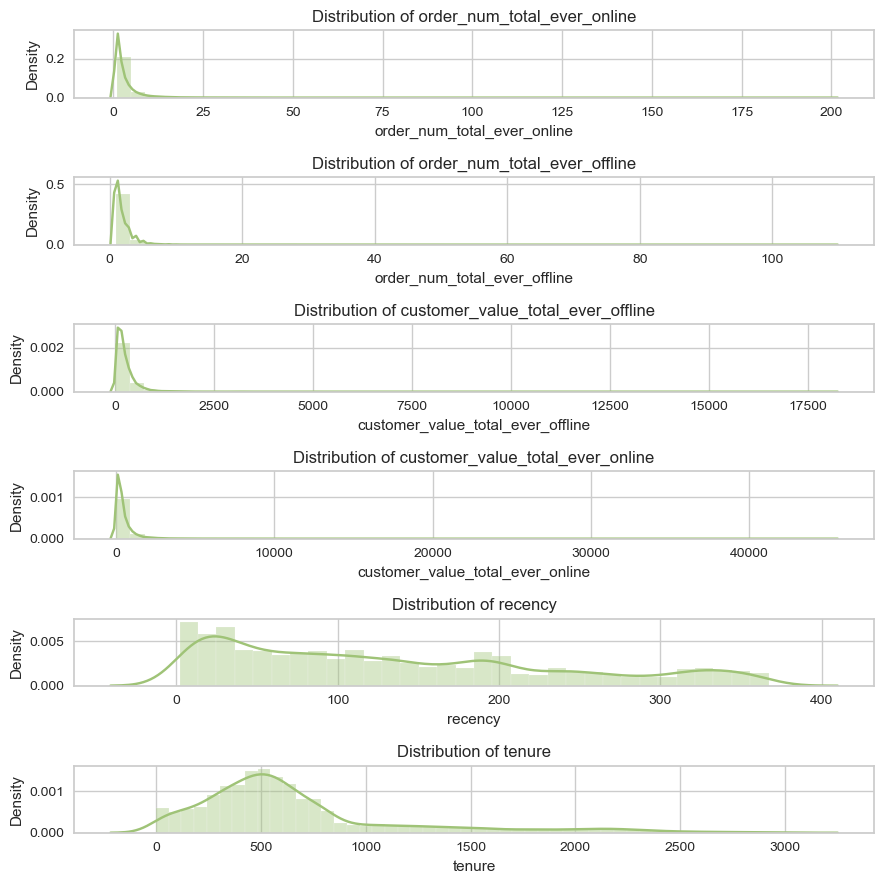

In [18]:
#SKEWNESS
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column],color = "g")
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

plt.figure(figsize=(9, 9))
plt.subplot(6, 1, 1)
check_skew(model_df,'order_num_total_ever_online')
plt.subplot(6, 1, 2)
check_skew(model_df,'order_num_total_ever_offline')
plt.subplot(6, 1, 3)
check_skew(model_df,'customer_value_total_ever_offline')
plt.subplot(6, 1, 4)
check_skew(model_df,'customer_value_total_ever_online')
plt.subplot(6, 1, 5)
check_skew(model_df,'recency')
plt.subplot(6, 1, 6)
check_skew(model_df,'tenure')
plt.tight_layout()
plt.savefig('before_transform.png', format='png', dpi=1000)
plt.show()


In [19]:
# Log transformation
model_df['order_num_total_ever_online']=np.log1p(model_df['order_num_total_ever_online'])
model_df['order_num_total_ever_offline']=np.log1p(model_df['order_num_total_ever_offline'])
model_df['customer_value_total_ever_offline']=np.log1p(model_df['customer_value_total_ever_offline'])
model_df['customer_value_total_ever_online']=np.log1p(model_df['customer_value_total_ever_online'])
model_df['recency']=np.log1p(model_df['recency'])
model_df['tenure']=np.log1p(model_df['tenure'])
model_df.head()

C:\Users\HuseyinBurakBolat\Anaconda3\Lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HuseyinBurakBolat\Anaconda3\Lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HuseyinBurakBolat\Anaconda3\Lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,recency,tenure
0,1.61,0.69,4.95,6.69,4.56,4.79
1,3.00,1.10,5.08,7.53,4.66,7.29
2,1.39,1.10,5.25,5.98,5.23,5.91
3,0.69,0.69,3.71,4.42,4.91,2.48
4,0.69,0.69,3.93,5.08,4.47,6.37


In [20]:
# Scaling
sc = MinMaxScaler((0, 1))
model_scaling = sc.fit_transform(model_df)
model_df=pd.DataFrame(model_scaling,columns=model_df.columns)
model_df.head()

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,recency,tenure
0,0.20,0.00,0.34,0.50,0.72,0.60
1,0.50,0.10,0.36,0.60,0.74,0.91
2,0.15,0.10,0.39,0.41,0.86,0.74
3,0.00,0.00,0.18,0.22,0.79,0.31
4,0.00,0.00,0.21,0.30,0.70,0.79


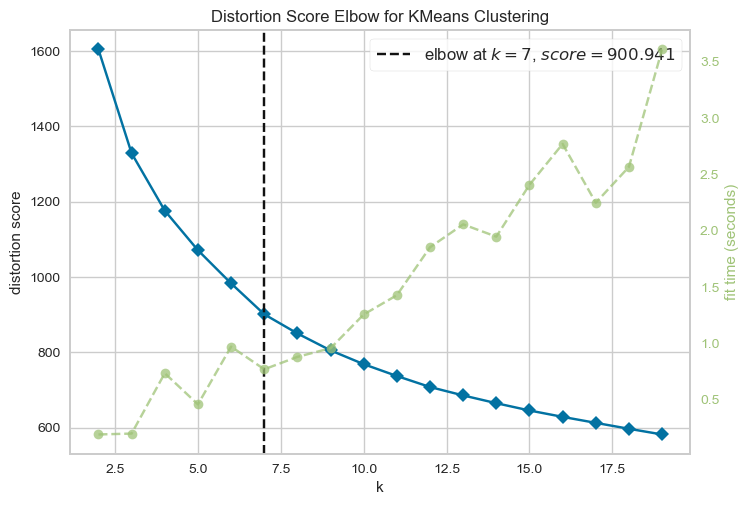

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
# Optimal number of clusters for KNN
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(model_df)
elbow.show()

In [22]:
# Modelling and Segmentation
k_means = KMeans(n_clusters = 7, random_state= 42).fit(model_df)
segments=k_means.labels_
segments

final_df = df[["master_id","order_num_total_ever_online","order_num_total_ever_offline","customer_value_total_ever_offline","customer_value_total_ever_online","recency","tenure"]]
final_df["segment"] = segments
final_df.head()

C:\Users\HuseyinBurakBolat\Anaconda3\Lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,master_id,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,recency,tenure,segment
0,cc294636-19f0-11eb-8d74-000d3a38a36f,4.00,1.00,139.99,799.38,95.00,119.00,6
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,19.00,2.00,159.97,1853.58,105.00,1469.00,6
2,69b69676-1a40-11ea-941b-000d3a38a36f,3.00,2.00,189.97,395.35,186.00,366.00,6
3,1854e56c-491f-11eb-806e-000d3a38a36f,1.00,1.00,39.99,81.98,135.00,11.00,3
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,1.00,1.00,49.99,159.99,86.00,582.00,4


In [23]:
# Analysis of Each Segment with statistical description
final_df.groupby("segment").agg({"order_num_total_ever_online":["mean","min","max"],
                                 "order_num_total_ever_offline":["mean","min","max"],
                                 "customer_value_total_ever_offline":["mean","min","max"],
                                 "customer_value_total_ever_online":["mean","min","max"],
                                 "recency":["mean","min","max"],
                                 "tenure":["mean","min","max","count"]})

order_num_total_ever_online             order_num_total_ever_offline             customer_value_total_ever_offline                 customer_value_total_ever_online                 recency              tenure                    
                               mean  min    max                         mean  min    max                              mean    min      max                             mean    min      max    mean   min    max   mean   min     max count
segment                                                                                                                                                                                                                                    
0                              1.42 1.00   5.00                         1.28 1.00   5.00                            145.16  10.00   829.98                           210.07  12.99  1519.17  225.71 88.00 367.00 489.85 52.00 2820.00  5448
1                              2.20 1.00  12.00                         2.10 1.00  14.00                            293.82  12.99  3425.14                           377.70  23.99  3444.08   10.00  2.00  27.00 665.01  2.00 3031.00  1841
2                              1.84 1.00  13.00                         3.77 1.00 109.00                            551.78 106.82 18119.14                           283.36  14.99  2587.20  153.29 22.00 366.00 729.95 20.00 2911.00  3269
3                              1.40 1.00   8.00                         1.13 1.00   6.00                            192.39  12.99  1333.00                           250.37  19.99  3476.81  139.55  4.00 367.00  37.24  0.00  132.00   828
4                              1.61 1.00   6.00                         1.48 1.00   6.00                            185.84  12.99  1406.85                           250.00  14.00  1307.33   50.33 15.00 109.00 604.52 43.00 2828.00  3340
5                              8.63 2.00 200.00                         2.10 1.00  36.00                            278.89  12.99  3589.65                          1475.52 265.97 45220.13   32.72  2.00 109.00 966.63 18.00 3034.00  1974
6                              6.37 1.00  55.00                         1.54 1.00  16.00                            184.41  10.49  1644.79                           985.51 180.96 12038.18  180.09 55.00 367.00 943.90 26.00 2964.00  3245

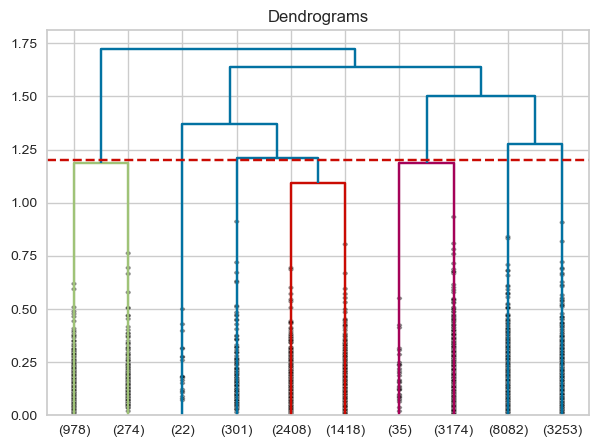

In [24]:
###############################################################
# 2- Customer Segmentation with Hierarchical Clustering
###############################################################

# 1. hierarchical clustering optimal number of clusters
hc_complete = linkage(model_df, 'complete')

plt.figure(figsize=(7, 5))
plt.title("Dendrograms")
dend = dendrogram(hc_complete,
                  truncate_mode="lastp",
                  p=10,
                  show_contracted=True,
                  leaf_font_size=10)
plt.axhline(y=1.2, color='r', linestyle='--')
plt.show()


In [25]:
# Modelling and Segmentation
hc = AgglomerativeClustering(n_clusters=5)
segments = hc.fit_predict(model_df)

final_df = df[["master_id","order_num_total_ever_online","order_num_total_ever_offline","customer_value_total_ever_offline","customer_value_total_ever_online","recency","tenure"]]
final_df["segment"] = segments
final_df.head()

# Analysis of Each Segment with statistical description
final_df.groupby("segment").agg({"order_num_total_ever_online":["mean","min","max"],
                                 "order_num_total_ever_offline":["mean","min","max"],
                                 "customer_value_total_ever_offline":["mean","min","max"],
                                 "customer_value_total_ever_online":["mean","min","max"],
                                 "recency":["mean","min","max"],
                                 "tenure":["mean","min","max","count"]})


C:\Users\HuseyinBurakBolat\Anaconda3\Lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


order_num_total_ever_online             order_num_total_ever_offline             customer_value_total_ever_offline                customer_value_total_ever_online                 recency              tenure                     
                               mean  min    max                         mean  min    max                              mean   min      max                             mean    min      max    mean   min    max   mean    min     max count
segment                                                                                                                                                                                                                                    
0                              1.37 1.00  13.00                         1.99 1.00 109.00                            261.97 10.49 18119.14                           208.07  12.99 30688.47  183.03 18.00 367.00 569.72   3.00 2911.00  8747
1                              3.75 1.00  49.00                         1.82 1.00  24.00                            240.98 12.99  3425.14                           638.61  19.99 12545.37   23.96  2.00 108.00 715.07  18.00 3034.00  4994
2                              6.91 1.00 200.00                         3.08 1.00  16.00                            427.12 12.99  2963.24                          1104.12 139.98 45220.13  131.57 14.00 365.00 914.49 109.00 3016.00  2396
3                              1.40 1.00   6.00                         1.20 1.00   6.00                            200.69 12.99  1019.97                           227.42  26.99  1389.60   92.52  4.00 367.00  80.26   0.00  555.00   985
4                              4.74 1.00  24.00                         1.12 1.00   4.00                            123.46 10.00  1049.92                           722.77  59.98  7665.28  196.52 36.00 367.00 876.95  71.00 2964.00  2823